# Project Graphs and Matching
## Subject
You must:
1. Find a dataset... Then find a relevant question or hypothesis about the dataset that would require a clustering or a graph construction to answer
2. Generate a Graph describing compatibilities between datapoints
So maby we should:
    - quantify the non quantitatives variables
    - normalize and / or weight (or doing dimensionnality reduction)
    - remove useless
    - create a distance
    - set a treshold
    - build edges
3. Return a clustering on the given datapoints to answer the question / validate hypothesis


## The dataset
### The generation
The generation of the dataset has been done through the spotify python API, see the Dataset-generation.ipynb notebook in order to do the same

### Loading the dataset

In [157]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
df = pd.read_csv("./datasets/playlist-gabriel.csv")
df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,uri,track_href,analysis_url,duration_ms,time_signature,added_at,song_title,artists,genres,principal_genre
0,0,0.661,0.765,2,-8.818,1,0.0297,0.0757,0.8010,0.0919,...,spotify:track:38CngZw3TDi2XDCQPMKHJR,https://api.spotify.com/v1/tracks/38CngZw3TDi2...,https://api.spotify.com/v1/audio-analysis/38Cn...,228293,4,2020-04-07T16:07:14Z,A Sheltered Place - Phaeleh Remix,"Way Out West,Phaeleh","['classic progressive house', 'nu skool breaks...",house
1,1,0.728,0.784,8,-12.477,1,0.0414,0.1030,0.8480,0.0858,...,spotify:track:6YJ9z4IInxfJWsjc6ADtV2,https://api.spotify.com/v1/tracks/6YJ9z4IInxfJ...,https://api.spotify.com/v1/audio-analysis/6YJ9...,377919,3,2020-04-07T13:40:07Z,Prelusion,"Mark Tarmonea,Yannek Maunz",['german house'],house
2,2,0.725,0.742,0,-8.646,1,0.0328,0.0887,0.8100,0.1070,...,spotify:track:4isQapTCsf1TvF9RkzfrCG,https://api.spotify.com/v1/tracks/4isQapTCsf1T...,https://api.spotify.com/v1/audio-analysis/4isQ...,277073,4,2020-04-07T09:13:47Z,Odyssee - Pt. 2,BLR,"['dutch edm', 'house']",house
3,3,0.689,0.810,8,-6.621,0,0.0464,0.0203,0.9010,0.1390,...,spotify:track:0oB0mWnbRYNsC2CicOkXZL,https://api.spotify.com/v1/tracks/0oB0mWnbRYNs...,https://api.spotify.com/v1/audio-analysis/0oB0...,407803,4,2020-04-06T14:33:04Z,GUFM - Folamour Remix,"Mangabey,Folamour",[],other
4,4,0.946,0.493,8,-9.654,1,0.0509,0.1620,0.2970,0.0875,...,spotify:track:0aKoR2iMGuqAUBBCdRwII8,https://api.spotify.com/v1/tracks/0aKoR2iMGuqA...,https://api.spotify.com/v1/audio-analysis/0aKo...,270000,4,2020-04-04T12:08:27Z,Prettiest Virgin (Radio Edit),Agar Agar,"['electronica', 'french indie pop', 'french in...",pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,0.692,0.626,11,-11.361,0,0.0637,0.0432,0.7970,0.1100,...,spotify:track:4bkTaAK3tvBi7M9S6UEyy2,https://api.spotify.com/v1/tracks/4bkTaAK3tvBi...,https://api.spotify.com/v1/audio-analysis/4bkT...,353541,4,2016-12-28T16:20:11Z,StillDreaming,Hypnagog,"['ambient psychill', 'deep psytrance']",techno
362,2,0.489,0.571,10,-11.268,0,0.0933,0.1480,0.6660,0.1830,...,spotify:track:6H0HOzCvYYbzdhhrOVBzxb,https://api.spotify.com/v1/tracks/6H0HOzCvYYbz...,https://api.spotify.com/v1/audio-analysis/6H0H...,262139,1,2016-12-28T16:20:11Z,FunkDiddle,Hypnagog,"['ambient psychill', 'deep psytrance']",techno
363,3,0.700,0.581,6,-7.116,1,0.1500,0.3580,0.0539,0.0825,...,spotify:track:3ndu6BpfkiGE4m0BboNUHv,https://api.spotify.com/v1/tracks/3ndu6BpfkiGE...,https://api.spotify.com/v1/audio-analysis/3ndu...,277385,4,2016-12-28T14:29:04Z,Tempo,"Ondubground,Biga Ranx","['dub reggae', 'electro dub', 'french dub']",dub
364,4,0.638,0.724,6,-7.291,1,0.0270,0.0206,0.5250,0.1390,...,spotify:track:5MFtsrwzB0SoZzp2QvaSmF,https://api.spotify.com/v1/tracks/5MFtsrwzB0So...,https://api.spotify.com/v1/audio-analysis/5MFt...,243016,4,2016-12-28T14:28:35Z,Because,Ondubground,"['dub reggae', 'electro dub', 'french dub']",dub


In [158]:
# cheking the types
df.dtypes

Unnamed: 0            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
added_at             object
song_title           object
artists              object
genres               object
principal_genre      object
dtype: object

### Explanation of the fields
Nearly every fields explanations can be found at this address: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

### Data exploration
#### Imports
let's import some usefull libraries to dig in the data

In [159]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

#### Utils
Let's create some function to plot the data correctly


In [160]:
def my_radarplot(categories: list, values: list, max_value: float=1.0, number_of_ticks: int=4, ticksize: int=8) :
    if number_of_ticks <= 0:
        # avoiding is a division by zero
        return
    
    # number of variable
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values += values[:1]
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    for tick in range(number_of_ticks):
        ticknumbers = [x / number_of_ticks for x in range(1, number_of_ticks)]
        ticklabels = [f"{x:.2f}" for x in ticknumbers]
        
    plt.yticks(ticknumbers, ticklabels, color="grey", size=ticksize)
    plt.ylim(0, max_value)
 
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)



#### Determine a listener profile
Let's take the average of all the interresting features of my playlist and see if we can profile a "listening mood"

In [161]:
interestingColumns = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']
df_my_profile_mean = df[interestingColumns].mean()

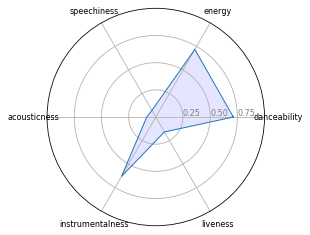

In [162]:
my_radarplot(df_my_profile_mean.keys(), df_my_profile_mean[:].tolist())

We can safely say that I do not listen to speech only podcast on spotify

#### How are distributed the music genres I listen to ?

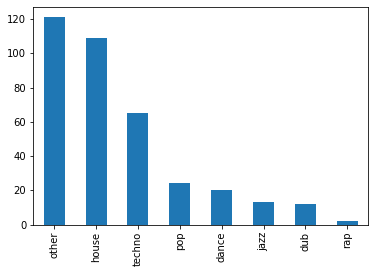

In [163]:
#df_principal_genres = df['principal_genre']
#df_principal_genres.value_counts().plot()

df_principal_genres = df['principal_genre']
df_principal_genres.value_counts().plot(kind="bar")



### What can we wonder ?
blabkabla

## Building a graph
### quantify the non quantitatives variables


### normalize and / or weight (or doing dimensionnality reduction)


### remove useless


### create a distance


### set a treshold


### build edges